# Principles of bootstrapping

Bootstrapping is, in some sense, the opposite of sampling from a population. Sampling treats your dataset as the population, and you generate a random subset. Bootstrapping treats your dataset as a sample and uses it to build up a theoretical population.

<center><img src="images/04.01.png"  style="width: 400px, height: 300px;"/></center>

# With or without replacement?

So far in the course, you've seen sampling with and without replacement. It's important to know when to use each method.

<center><img src="images/04.02.png"  style="width: 400px, height: 300px;"/></center>


# Generating a bootstrap distribution

The process for generating a bootstrap distribution is similar to the process for generating a sampling distribution; only the first step is different.

To make a sampling distribution, you start with the population and sample without replacement. To make a bootstrap distribution, you start with a sample and sample that with replacement. After that, the steps are the same: calculate the summary statistic that you are interested in on that sample/resample, then replicate the process many times. In each case, you can visualize the distribution with a histogram.

Here, `spotify_sample` is a subset of the `spotify_population` dataset. To make it easier to see how resampling works, a row index column called '`index`' has been added, and only the artist name, song name, and `danceability` columns have been included.

In [2]:
import pandas as pd
import numpy as np
spotify_sample = pd.read_feather("dataset/spotify_2000_2020.feather")
# Generate 1 bootstrap resample
spotify_1_resample = spotify_sample.sample(frac=1, replace=True)

# Calculate of the danceability column of spotify_1_resample
mean_danceability_1 = np.mean(spotify_1_resample['danceability'])

# Print the result
print(mean_danceability_1)

0.5911235044171278


In [3]:
# Replicate this 1000 times
mean_danceability_1000 = []
for i in range(1000):
	mean_danceability_1000.append(
        np.mean(spotify_sample.sample(frac=1, replace=True)['danceability'])
	)
  
# Print the result
print(mean_danceability_1000)

[0.5918132874015712, 0.5916158824659126, 0.5930356803341632, 0.5913015003840941, 0.5912837382369814, 0.5913071106203134, 0.5910235260226614, 0.5908955828692107, 0.5910437584021476, 0.5918974625504154, 0.592164161225269, 0.5911384458421322, 0.5904784064720559, 0.5906658920683674, 0.5920601570001888, 0.5905411777415026, 0.5901893988861134, 0.5913529359516023, 0.5920622959477637, 0.5896319497791385, 0.5909629873247572, 0.5916524918379037, 0.5911023790090218, 0.5916308142884545, 0.5903353658536591, 0.5903099889571677, 0.5918633618206267, 0.5908310543499082, 0.5912360956404752, 0.5926664682158669, 0.5921562439984606, 0.5908269709045434, 0.5913785841175359, 0.5910694641828237, 0.592342668523147, 0.5913321994430589, 0.5913829412329504, 0.5892319257729968, 0.592024039754177, 0.5923542898982143, 0.5915990973689175, 0.5914078332052979, 0.590116686671781, 0.5917427069329727, 0.5921364101209928, 0.5906800965047003, 0.5903121111004397, 0.5921722921067807, 0.5911925460917901, 0.5916622527366945, 0.5

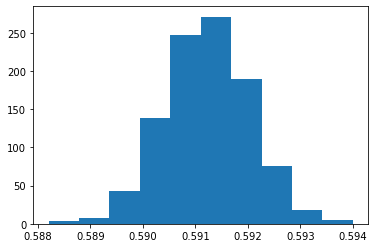

In [4]:
import matplotlib.pyplot as plt
# Draw a histogram of the resample means
plt.hist(mean_danceability_1000)
plt.show()

# Bootstrap statistics and population statistics

Bootstrap distribution statistics can be used to estimate population parameters. But can you always rely on them to give an accurate estimate of an unknown population parameter?

Should the mean and the standard deviation of the bootstrap distribution both be used to estimate the corresponding values of the population?

- No, the mean of the bootstrap distribution will always be near the sample mean, which may not necessarily be very close to the population mean.

# Sampling distribution vs. bootstrap distribution

The sampling distribution and bootstrap distribution are closely linked. In situations where you can repeatedly sample from a population (these occasions are rare), it's helpful to generate both the sampling distribution and the bootstrap distribution, one after the other, to see how they are related.

Here, the statistic you are interested in is the mean `popularity` score of the songs.

In [5]:
spotify_population = pd.read_feather("dataset/spotify_2000_2020.feather")
mean_popularity_2000_samp = []

# Generate a sampling distribution of 2000 replicates
for i in range(2000) :
    mean_popularity_2000_samp.append(
    	# Sample 500 rows and calculate the mean popularity 
    	np.mean(spotify_population["popularity"].sample(500, replace = False))
    )

# Print the sampling distribution results
print(mean_popularity_2000_samp)

[54.848, 55.454, 54.938, 55.036, 54.704, 54.352, 55.63, 54.07, 54.828, 53.652, 54.772, 54.986, 55.048, 54.77, 55.464, 54.106, 54.638, 54.76, 55.626, 54.96, 54.874, 53.996, 54.77, 53.982, 55.412, 54.642, 54.594, 54.268, 54.648, 55.132, 54.91, 54.566, 55.472, 54.076, 55.368, 54.802, 54.876, 54.458, 54.296, 54.764, 54.36, 55.38, 55.222, 54.662, 54.92, 54.464, 54.056, 54.362, 53.846, 54.858, 54.414, 54.468, 55.796, 54.116, 54.774, 54.738, 54.614, 55.264, 55.048, 54.532, 54.796, 54.988, 54.704, 54.492, 54.292, 54.848, 55.03, 55.05, 56.01, 55.348, 54.222, 54.442, 54.566, 54.632, 54.716, 54.654, 55.036, 55.8, 54.924, 55.32, 54.506, 54.88, 55.062, 54.564, 55.048, 54.686, 54.32, 53.326, 55.284, 54.812, 55.412, 55.33, 54.966, 55.61, 54.924, 55.378, 54.594, 54.132, 55.352, 54.94, 53.862, 55.586, 55.206, 54.078, 54.79, 55.292, 54.782, 55.344, 54.396, 54.726, 54.818, 55.058, 54.394, 54.554, 55.424, 54.562, 55.524, 54.208, 55.078, 54.666, 54.146, 54.858, 54.722, 54.688, 55.464, 54.488, 54.804, 54.95

In [6]:
mean_popularity_2000_boot = []

# Generate a bootstrap distribution of 2000 replicates
for i in range(2000):
    mean_popularity_2000_boot.append(
    	# Resample 500 rows and calculate the mean popularity     
    	np.mean(spotify_sample.sample(n = 500, replace = True)["popularity"])
    )

# Print the bootstrap distribution results
print(mean_popularity_2000_boot)

[54.792, 54.724, 55.258, 54.794, 54.866, 55.294, 55.838, 54.824, 55.554, 55.008, 54.914, 55.326, 54.994, 54.398, 54.632, 55.358, 55.49, 53.968, 54.918, 55.152, 55.286, 54.976, 55.442, 55.16, 55.8, 54.736, 54.562, 55.384, 54.61, 55.362, 54.904, 53.924, 55.052, 54.644, 55.334, 55.388, 54.624, 54.92, 54.06, 55.088, 53.826, 55.002, 54.02, 54.636, 55.032, 54.534, 55.078, 54.824, 55.64, 55.656, 54.954, 54.738, 54.934, 54.902, 55.122, 55.434, 54.738, 55.098, 54.892, 54.488, 55.24, 54.882, 55.098, 55.152, 55.328, 56.058, 54.776, 55.216, 55.578, 56.144, 53.98, 54.38, 54.77, 55.406, 54.678, 54.952, 54.402, 54.592, 54.832, 55.116, 55.052, 54.55, 55.056, 54.634, 55.264, 55.478, 55.048, 54.666, 54.568, 54.918, 55.54, 54.448, 54.266, 54.12, 54.384, 54.792, 54.73, 55.284, 54.144, 54.246, 54.706, 55.448, 54.786, 54.716, 55.066, 54.898, 54.674, 55.356, 54.99, 54.458, 54.486, 55.614, 54.868, 54.726, 54.406, 53.916, 54.752, 54.376, 54.804, 55.04, 54.59, 55.972, 55.038, 54.958, 54.514, 55.382, 54.658, 54.

# Compare sampling and bootstrap means

To make calculation easier, distributions similar to those calculated from the previous exercise have been included, this time using a sample size of 5000.

In [8]:
sampling_distribution = mean_popularity_2000_samp
bootstrap_distribution = mean_popularity_2000_boot

# Calculate the population mean popularity
pop_mean = spotify_population["popularity"].mean()

# Calculate the original sample mean popularity
samp_mean = spotify_sample["popularity"].mean()

# Calculate the sampling dist'n estimate of mean popularity
samp_distn_mean = np.mean(sampling_distribution)

# Calculate the bootstrap dist'n estimate of mean popularity
boot_distn_mean = np.mean(bootstrap_distribution)

# Print the means
print([pop_mean, samp_mean, samp_distn_mean, boot_distn_mean])

[54.837142308430955, 54.837142308430955, 54.831693, 54.84549499999999]


# Compare sampling and bootstrap standard deviations

In the same way that you looked at how the sampling distribution and bootstrap distribution could be used to estimate the population mean, you'll now take a look at how they can be used to estimate variation, or more specifically, the standard deviation, in the population.

In [9]:
# Calculate the population std dev popularity
pop_sd = np.std(spotify_population["popularity"], ddof = 0)

# Calculate the original sample std dev popularity
samp_sd = np.std(spotify_sample["popularity"], ddof = 1)

# Calculate the sampling dist'n estimate of std dev popularity
samp_distn_sd = np.std(sampling_distribution, ddof = 1) * np.sqrt(5000) 

# Calculate the bootstrap dist'n estimate of std dev popularity
boot_distn_sd = np.std(bootstrap_distribution, ddof = 1) * np.sqrt(5000) 

# Print the standard deviations
print([pop_sd, samp_sd, samp_distn_sd, boot_distn_sd])

[10.880065274257204, 10.88019587082396, 33.54509107638048, 33.92323875957261]


# Confidence interval interpretation

When reporting results, it is common to provide a confidence interval alongside an estimate.

What information does that confidence interval provide?

- A range of plausible values for an unknown quantity.

# Calculating confidence intervals

You have learned about two methods for calculating confidence intervals: the quantile method and the standard error method. The standard error method involves using the inverse cumulative distribution function (inverse CDF) of the normal distribution to calculate confidence intervals. In this exercise, you'll perform these two methods on the Spotify data.

In [10]:
# Generate a 95% confidence interval using the quantile method
lower_quant = np.quantile(bootstrap_distribution, 0.025)
upper_quant = np.quantile(bootstrap_distribution, 0.975)

# Print quantile method confidence interval
print((lower_quant, upper_quant))

(53.88395, 55.79409999999999)


In [13]:
from scipy.stats import norm
# Find the mean and std dev of the bootstrap distribution
point_estimate = np.mean(bootstrap_distribution)
standard_error = np.std(bootstrap_distribution,ddof = 1)

# Find the lower limit of the confidence interval
lower_se = norm.ppf(0.025, loc=point_estimate, scale=standard_error)

# Find the upper limit of the confidence interval
upper_se = norm.ppf(0.975, loc=point_estimate, scale=standard_error)

# Print standard error method confidence interval
print((lower_se, upper_se))

(53.90520807337561, 55.785781926624374)
